<a href="https://colab.research.google.com/github/rrwiren/ilmanlaatu-ennuste-helsinki/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Käytetään laitetta: cpu
Ladataan dataa tiedostosta: processed_hourly_ozone_weather_data.parquet
Parquet-tiedosto ladattu.

Datan perustiedot:
Muoto: (43848, 5)
Aikaväli: 2020-04-01 00:00:00 - 2025-04-01 23:00:00
Kaikki ladatut sarakkeet: ['Otsoni [µg/m³]', 'Lämpötilan keskiarvo [°C]', 'Keskituulen nopeus [m/s]', 'Ilmanpaineen keskiarvo [hPa]', 'Tuulen suunnan keskiarvo [°]']

Puuttuvat arvot per sarake (ennen täyttöä):
Otsoni [µg/m³]                  0
Lämpötilan keskiarvo [°C]       0
Keskituulen nopeus [m/s]        0
Ilmanpaineen keskiarvo [hPa]    0
Tuulen suunnan keskiarvo [°]    0
dtype: int64
Ei puuttuvia arvoja.

Datan lataus ja peruspuhdistus valmiit.

Tarkistetaan vaadittujen sarakkeiden olemassaolo...
Kaikki vaaditut sarakkeet löytyivät.

Suoritetaan ominaisuuksien muokkaus (Feature Engineering)...
Lisätty syklinen kellonaika (hour_sin, hour_cos).
Muunnettu tuulen suunta sykliseksi (wind_dir_sin, wind_dir_cos).
Ominaisuuksien muokkaus valmis.
Muokattu DataFrame sisältää nyt s

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 01/50 - Train Loss: 0.469775 - Valid Loss: 0.480779 (Uusi paras!)
Epoch 02/50 - Train Loss: 0.393161 - Valid Loss: 0.481386 (Ei parannusta 1/7)
Epoch 03/50 - Train Loss: 0.365044 - Valid Loss: 0.466075 (Uusi paras!)
Epoch 04/50 - Train Loss: 0.339272 - Valid Loss: 0.462919 (Uusi paras!)
Epoch 05/50 - Train Loss: 0.308128 - Valid Loss: 0.504289 (Ei parannusta 1/7)
Epoch 06/50 - Train Loss: 0.269528 - Valid Loss: 0.543608 (Ei parannusta 2/7)
Epoch 07/50 - Train Loss: 0.238347 - Valid Loss: 0.587133 (Ei parannusta 3/7)
Epoch 08/50 - Train Loss: 0.209620 - Valid Loss: 0.638147 (Ei parannusta 4/7)
Epoch 09/50 - Train Loss: 0.187971 - Valid Loss: 0.665726 (Ei parannusta 5/7)
Epoch 10/50 - Train Loss: 0.173493 - Valid Loss: 0.701169 (Ei parannusta 6/7)
Epoch 11/50 - Train Loss: 0.159720 - Valid Loss: 0.705432 (Ei parannusta 7/7)

Early stopping 7 epochin jälkeen ilman parannusta.

Ladattu paras malli Early Stoppingin perusteella.

Koulutus valmis.


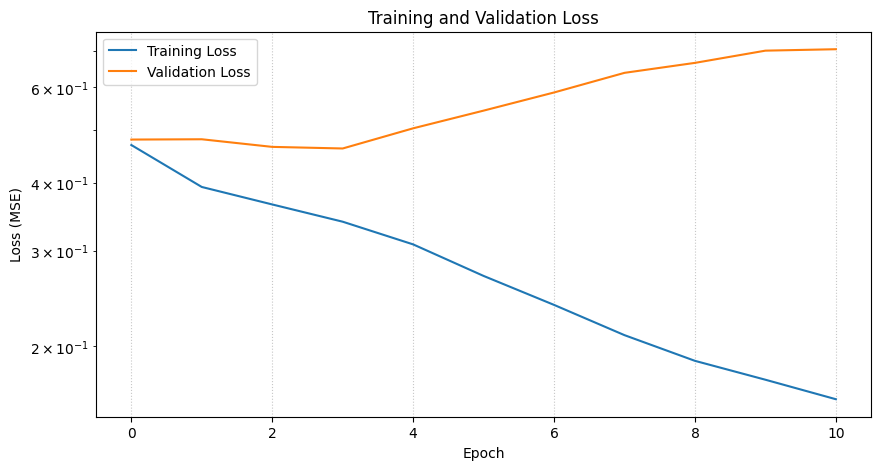


--- Mallin Arviointi ---

Aloitetaan arviointi testidatalla...


Testaus:   0%|          | 0/102 [00:00<?, ?it/s]

GRU-mallin ennusteet käännetty alkuperäiseen skaalaan.
Muutetaan kohdemuoto (6483, 24, 1) -> 2D käyttämällä squeeze(-1)...

--- GRU-Mallin Arviointi (kaikki 24 tuntia) ---
RMSE: 13.7105 µg/m³
MAE:  10.3365 µg/m³
Lasketaan Baseline-ennuste (jokainen 24h jakso = jakson eka arvo)...

--- Baseline-Mallin Arviointi (Naiivi Persistenssi) ---
RMSE: 17.2667 µg/m³
MAE:  12.3915 µg/m³

--- Vertailu Baselineen ---
GRU vs Baseline RMSE: +3.5561 µg/m³ (GRU parempi)
GRU vs Baseline MAE:  +2.0550 µg/m³ (GRU parempi)

Lasketaan 8h liukuvia keskiarvoja ja verrataan kynnysarvoon (120 µg/m³)...

--- 8h Liukuvan Keskiarvon Varoitustason Ylityksen Arviointi (GRU-malli) ---
Todellisia varoitusjaksoja testidatassa (> 120 µg/m³): 2 / 6483
Ennustettuja varoitusjaksoja (GRU):                      0 / 6483

Sekaannusmatriisi (Confusion Matrix) varoituksille (GRU):
                           Ennuste EI  Ennuste KYLLÄ
Todellinen EI Varoitusta         6481              0
Todellinen KYLLÄ Varoitus           2       

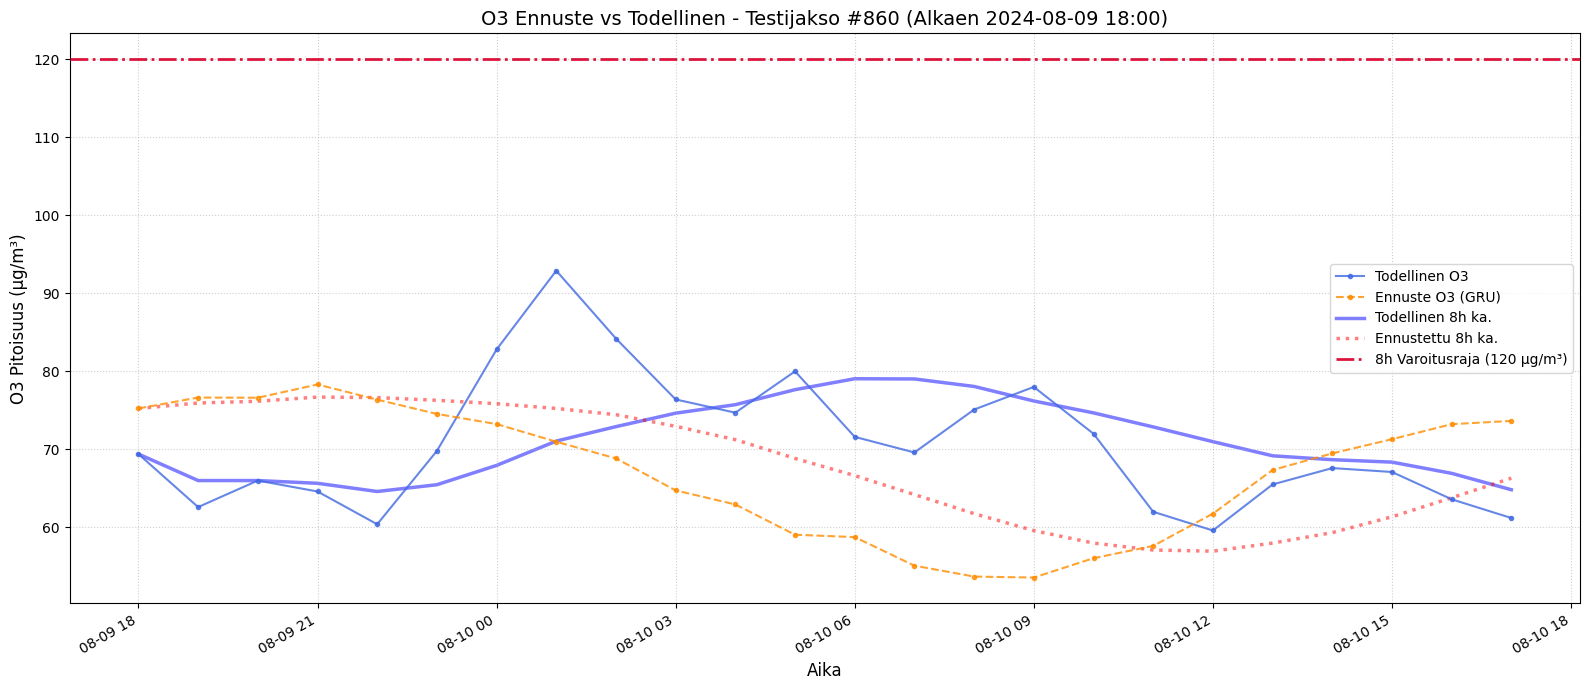

NameError: name 'targets_for_rolling' is not defined

<Figure size 700x700 with 0 Axes>

In [2]:
# -*- coding: utf-8 -*-
# @title 0. Esitiedot ja Ajo-ohjeet (YKSI TIEDOSTO VERSIO v6)
"""
Otsoniennuste Helsinki - Paranneltu GRU-malli (PyTorch) v6 - Yksi Tiedosto

Tämä on yksi yhtenäinen skripti, joka sisältää kaikki aiemmat korjaukset
ja parannukset. Se lataa esikäsitellyn otsoni- ja säädatan, muokkaa
ominaisuuksia, kouluttaa GRU-mallin ja arvioi sitä monipuolisesti.
Sisältää korjaukset scope- ja tensor shape -ongelmiin.

AJO-OHJEET COLABISSA:
1. Kopioi tämä KOKO koodilohko.
2. Avaa Google Colab (https://colab.research.google.com/).
3. Luo uusi muistikirja (File -> New notebook).
4. Liitä KOKO koodi YHTEEN koodisoluun.
5. Aja solu (Play-nappi tai Shift+Enter).
6. Tarkastele tulosteita ja kuvaajia lopussa.
"""

# @title 1. Asennukset ja Tuonnit (Installations and Imports)
# Asennetaan tarvittavat kirjastot (tarvittaessa Colabissa)
# !pip install pandas numpy scikit-learn matplotlib torch pyarrow fastparquet -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split # Ei käytetä lopullisessa jaossa
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import requests
import io
import os
from tqdm.notebook import tqdm # Edistymispalkki Colabissa
import math
import copy # Tarvitaan mallin tilan kopiointiin Early Stoppingissa

# Asetetaan laite (GPU jos saatavilla, muuten CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Käytetään laitetta: {device}")

# @title 2. Parametrit ja Asetukset (Parameters and Settings)

# --- Data ja GitHub ---
GITHUB_DATA_URL = 'https://raw.githubusercontent.com/rrwiren/ilmanlaatu-ennuste-helsinki/main/data/processed/processed_hourly_ozone_weather_data.parquet'
LOCAL_DATA_PATH = 'processed_hourly_ozone_weather_data.parquet' # Ladataan tähän tiedostoon

# --- Datan sarakkeet (tarkistettu vastaamaan tiedostoa) ---
TARGET_COLUMN = 'Otsoni [µg/m³]' # Tämä on ennustettava kohde
ORIGINAL_FEATURE_COLUMNS = [      # Alkuperäiset sarakkeet datassa, joita käytetään
    'Otsoni [µg/m³]',             # Käytetään myös historiallista O3:sta piirteenä
    'Lämpötilan keskiarvo [°C]',
    'Keskituulen nopeus [m/s]',
    'Ilmanpaineen keskiarvo [hPa]',
    'Tuulen suunnan keskiarvo [°]'
]
# Huom: Muokatut ominaisuudet (aika, tuulensuunta sin/cos) lisätään myöhemmin koodissa

# Aikasarjaparametrit
SEQUENCE_LENGTH = 72  # Kuinka monta tuntia historiaa käytetään syötteenä (esim. 3 vrk)
PREDICTION_HORIZON = 24 # Kuinka monta tuntia eteenpäin ennustetaan

# --- GRU-mallin Hyperparametrit ---
# INPUT_SIZE lasketaan myöhemmin feature engineeringin jälkeen
HIDDEN_SIZE = 64          # GRU-kerroksen piilotilan koko
NUM_LAYERS = 2            # GRU-kerrosten määrä
OUTPUT_SIZE = PREDICTION_HORIZON # Ennustetaan kaikki 24 tuntia kerralla
DROPOUT_PROB = 0.2        # Dropout-todennäköisyys regularisointiin

# --- Koulutusparametrit ---
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 50              # Voit lisätä epochien määrää tarvittaessa
TEST_SPLIT_RATIO = 0.15   # Testijoukon osuus (viimeisimmät tiedot)
VALID_SPLIT_RATIO = 0.15  # Validointijoukon osuus (ennen testijoukkoa)
EARLY_STOPPING_PATIENCE = 7 # Kärsivällisyys Early Stoppingille

# --- Varoitusraja (8h liukuva keskiarvo) ---
O3_THRESHOLD_8H_AVG = 120 # µg/m³ (Virallinen varoitusraja)

# --- Satunnaisuuden kiinnitys vertailtavuuden vuoksi ---
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    # Nämä voivat hidastaa ajoa, mutta parantavat toistettavuutta GPU:lla
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


# @title 3. Funktiot Datan Lataukseen ja Käsittelyyn

def download_data(url, local_path):
    """Lataa tiedoston URL:sta paikalliseen polkuun."""
    try:
        print(f"Yritetään ladata dataa osoitteesta {url}...")
        response = requests.get(url)
        response.raise_for_status() # Tarkistaa virheet (esim. 404 Not Found)
        with open(local_path, 'wb') as f:
            f.write(response.content)
        print(f"Data ladattu onnistuneesti: {local_path}")
        return True
    except requests.exceptions.RequestException as e:
        print(f"Virhe datan latauksessa: {e}")
        return False

def load_data(filepath):
    """Lataa datan parquet-tiedostosta ja suorittaa perustarkistukset (KORJATTU VERSIO)."""
    if not os.path.exists(filepath):
        print(f"Tiedostoa {filepath} ei löytynyt paikallisesti.")
        if not download_data(GITHUB_DATA_URL, filepath):
            return None # Lopeta jos lataus epäonnistui

    try:
        print(f"Ladataan dataa tiedostosta: {filepath}")
        df = pd.read_parquet(filepath)
        print("Parquet-tiedosto ladattu.")

        # --- Aikaindeksin varmistus ---
        if not isinstance(df.index, pd.DatetimeIndex):
             if 'timestamp' in df.columns: # Yleinen nimi aikaleimalle
                  df['timestamp'] = pd.to_datetime(df['timestamp'])
                  df.set_index('timestamp', inplace=True)
                  print("Muutettu 'timestamp'-sarake indeksiksi.")
             else:
                 try:
                    df.index = pd.to_datetime(df.index)
                    print("Muutettu olemassaoleva indeksi datetime-indeksiksi.")
                 except Exception as e:
                    print(f"Indeksin muuttaminen datetimeksi epäonnistui: {e}")
                    print("Varmista, että datassa on aikaleimaindeksi tai 'timestamp'-sarake.")
                    return None

        df.sort_index(inplace=True) # Varmista aikajärjestys

        print(f"\nDatan perustiedot:")
        print(f"Muoto: {df.shape}")
        print(f"Aikaväli: {df.index.min()} - {df.index.max()}")
        print(f"Kaikki ladatut sarakkeet: {df.columns.tolist()}")

        # --- Puuttuvien arvojen käsittely ---
        print("\nPuuttuvat arvot per sarake (ennen täyttöä):")
        null_counts_before = df.isnull().sum()
        print(null_counts_before)
        if null_counts_before.sum() > 0:
            print("Täytetään puuttuvat arvot (ffill + bfill)...")
            df.ffill(inplace=True)
            df.bfill(inplace=True)
            print("\nPuuttuvat arvot täytön jälkeen:")
            null_counts_after = df.isnull().sum()
            print(null_counts_after)
            # Tarkistetaan uudelleen, jos bfill ei auttanut alkuun
            if null_counts_after.sum() > 0:
                 print("VAROITUS: Datan sisältää edelleen puuttuvia arvoja! Poistetaan rivit.")
                 df.dropna(inplace=True)
                 print(f"Datan muoto NaN-rivien poiston jälkeen: {df.shape}")
        else:
            print("Ei puuttuvia arvoja.")

        print("\nDatan lataus ja peruspuhdistus valmiit.")
        # Palautetaan koko ladattu ja puhdistettu DataFrame
        return df

    except Exception as e:
        print(f"Virhe datan käsittelyssä load_data funktiossa: {e}")
        return None

def feature_engineer(df):
    """Lisää aika- ja syklisiä ominaisuuksia DataFrameen."""
    print("\nSuoritetaan ominaisuuksien muokkaus (Feature Engineering)...")
    df_eng = df.copy()
    engineered_cols = [] # Kerätään uusien sarakkeiden nimet

    # 1. Kellonaika (syklinen)
    df_eng['hour'] = df_eng.index.hour
    df_eng['hour_sin'] = np.sin(2 * np.pi * df_eng['hour'] / 24.0)
    df_eng['hour_cos'] = np.cos(2 * np.pi * df_eng['hour'] / 24.0)
    df_eng.drop('hour', axis=1, inplace=True) # Poista alkuperäinen tuntisarake
    engineered_cols.extend(['hour_sin', 'hour_cos'])
    print("Lisätty syklinen kellonaika (hour_sin, hour_cos).")

    # 2. Tuulen suunta (syklinen)
    wind_dir_col = 'Tuulen suunnan keskiarvo [°]'
    if wind_dir_col in df_eng.columns:
        df_eng['wind_dir_rad'] = np.deg2rad(df_eng[wind_dir_col])
        df_eng['wind_dir_sin'] = np.sin(df_eng['wind_dir_rad'])
        df_eng['wind_dir_cos'] = np.cos(df_eng['wind_dir_rad'])
        df_eng.drop([wind_dir_col, 'wind_dir_rad'], axis=1, inplace=True)
        engineered_cols.extend(['wind_dir_sin', 'wind_dir_cos'])
        print("Muunnettu tuulen suunta sykliseksi (wind_dir_sin, wind_dir_cos).")
    else:
        print(f"Saraketta '{wind_dir_col}' ei löytynyt, tuulensuunnan muokkausta ei tehty.")

    print("Ominaisuuksien muokkaus valmis.")
    print(f"Muokattu DataFrame sisältää nyt sarakkeet: {df_eng.columns.tolist()}")
    return df_eng

def create_sequences(features_scaled, targets_original, sequence_length, prediction_horizon):
    """
    Luo syötesekvenssejä (skaalattu) ja alkuperäisiä kohde-ennusteita.
    """
    X, y_orig = [], []
    print(f"Luodaan sekvenssejä: sequence_length={sequence_length}, prediction_horizon={prediction_horizon}")
    print(f"features_scaled shape: {features_scaled.shape}, targets_original shape: {targets_original.shape}")
    # Varmistetaan, että dataa on tarpeeksi
    if len(features_scaled) < sequence_length + prediction_horizon:
        print("VAROITUS: Ei tarpeeksi dataa sekvenssien luomiseen annetuilla parametreillä!")
        return np.array(X), np.array(y_orig) # Palautetaan tyhjät arrayt

    # Loopataan niin, että viimeinen y alkaa kohdasta len - prediction_horizon
    for i in range(len(features_scaled) - sequence_length - prediction_horizon + 1):
        X.append(features_scaled[i:(i + sequence_length)])
        # Otetaan vain O3-arvot (target) ennustejaksolle alkuperäisestä datasta
        y_orig.append(targets_original[i + sequence_length : i + sequence_length + prediction_horizon])

    print(f"Luotu {len(X)} sekvenssiä.")
    return np.array(X), np.array(y_orig)


# @title 4. Pääskriptin Suoritus: Datan Käsittely

# === PÄÄSKRIPTIN SUORITUSLOGIIKKA ALKAA TÄSTÄ ===

# --- Alustetaan muuttujat siltä varalta, että jokin vaihe epäonnistuu ---
df_raw = None
df_engineered = None
train_loader = None
valid_loader = None
test_loader = None
o3_scaler = None
feature_scaler = None
INPUT_SIZE = None
model = None
test_preds_orig = None
test_targets_orig = None
test_timestamps = None

# --- Ladataan data ---
df_raw_full = load_data(LOCAL_DATA_PATH) # Ladataan ensin kaikki sarakkeet

if df_raw_full is not None:
    # --- TARKISTETAAN TARVITTAVAT SARAKKEET ---
    print("\nTarkistetaan vaadittujen sarakkeiden olemassaolo...")
    required_cols_for_features = ORIGINAL_FEATURE_COLUMNS
    all_required_cols = list(set(required_cols_for_features + [TARGET_COLUMN]))

    missing_cols = [col for col in all_required_cols if col not in df_raw_full.columns]

    if missing_cols:
        print(f"\nVIRHE: Seuraavia vaadittuja sarakkeita ei löytynyt ladatusta datasta: {missing_cols}")
        raise ValueError(f"Vaadittuja sarakkeita puuttuu, ei voida jatkaa: {missing_cols}")
    else:
        print("Kaikki vaaditut sarakkeet löytyivät.")
        # Valitaan vain ne sarakkeet, jotka määriteltiin ORIGINAL_FEATURE_COLUMNS-listassa
        df_raw = df_raw_full[ORIGINAL_FEATURE_COLUMNS].copy()

    # --- Ominaisuuksien muokkaus ---
    df_engineered = feature_engineer(df_raw)
    FINAL_FEATURE_COLUMNS = df_engineered.columns.tolist()
    INPUT_SIZE = len(FINAL_FEATURE_COLUMNS)
    print(f"\nLopullinen ominaisuuksien määrä (INPUT_SIZE): {INPUT_SIZE}")
    print(f"Lopulliset ominaisuudet mallille: {FINAL_FEATURE_COLUMNS}")

    # --- Datan Jako (Train, Validation, Test) ---
    n = len(df_engineered)
    test_split_idx = int(n * (1 - TEST_SPLIT_RATIO))
    valid_split_idx = int(test_split_idx * (1 - VALID_SPLIT_RATIO / (1 - TEST_SPLIT_RATIO)))

    df_train = df_engineered[:valid_split_idx]
    df_valid = df_engineered[valid_split_idx:test_split_idx]
    df_test = df_engineered[test_split_idx:]

    print(f"\nDatan jako:")
    print(f"Train: {df_train.shape[0]} riviä ({df_train.index.min()} - {df_train.index.max()})")
    print(f"Valid: {df_valid.shape[0]} riviä ({df_valid.index.min()} - {df_valid.index.max()})")
    print(f"Test:  {df_test.shape[0]} riviä ({df_test.index.min()} - {df_test.index.max()})")

    # --- Skaalaus ---
    try:
        feature_scaler = StandardScaler()
        scaled_train_features = feature_scaler.fit_transform(df_train)
        scaled_valid_features = feature_scaler.transform(df_valid)
        scaled_test_features = feature_scaler.transform(df_test)
        print("Ominaisuudet skaalattu (sovitettu vain harjoitusdataan).")

        o3_scaler = StandardScaler()
        # Huom: Käytetään df_raw:ta alkuperäisen O3-sarakkeen hakemiseen oikealla indeksillä
        o3_scaler.fit(df_raw.loc[df_train.index, [TARGET_COLUMN]])
        print("Erillinen skaalain luotu ja sovitettu kohdemuuttujalle (O3).")

        # Haetaan ALKUPERÄISET O3-kohdearvot jakojen mukaisesti
        o3_train_targets_original = df_raw.loc[df_train.index, [TARGET_COLUMN]].values
        o3_valid_targets_original = df_raw.loc[df_valid.index, [TARGET_COLUMN]].values
        o3_test_targets_original = df_raw.loc[df_test.index, [TARGET_COLUMN]].values

    except Exception as e:
        print(f"VIRHE skaalauksessa: {e}")
        # Asetetaan muuttujat Noneksi, jotta myöhemmät vaiheet eivät suoritu
        feature_scaler = None
        o3_scaler = None
        # Voitaisiin myös nostaa virhe tässä: raise e

    # --- Sekvenssien Luonti (jos skaalaus onnistui) ---
    if feature_scaler is not None and o3_scaler is not None:
        print("\nLuodaan aikasarjasekvenssejä...")
        X_train, y_train_original = create_sequences(scaled_train_features, o3_train_targets_original, SEQUENCE_LENGTH, PREDICTION_HORIZON)
        X_valid, y_valid_original = create_sequences(scaled_valid_features, o3_valid_targets_original, SEQUENCE_LENGTH, PREDICTION_HORIZON)
        X_test, y_test_original = create_sequences(scaled_test_features, o3_test_targets_original, SEQUENCE_LENGTH, PREDICTION_HORIZON)

        # Tarkistetaan, onko sekvenssien luonti onnistunut (ei tyhjiä arrayita)
        if X_train.size == 0 or X_valid.size == 0 or X_test.size == 0:
             print("VIRHE: Sekvenssien luonti epäonnistui (todennäköisesti liian vähän dataa jossain jaossa). Ei voida jatkaa.")
             # Asetetaan loaderit Noneksi
             train_loader = None
             valid_loader = None
             test_loader = None
        else:
            # Skaalataan y-arvot (kohdearvot)
            try:
                y_train_scaled = o3_scaler.transform(y_train_original.reshape(-1, 1)).reshape(y_train_original.shape)
                y_valid_scaled = o3_scaler.transform(y_valid_original.reshape(-1, 1)).reshape(y_valid_original.shape)
                # y_test_scaled lasketaan tarvittaessa myöhemmin tai ei lainkaan, koska käytämme y_test_originalia
                print("Kohdearvot (y) skaalattu koulutusta ja validointia varten.")
            except Exception as e:
                print(f"VIRHE y-arvojen skaalauksessa: {e}")
                train_loader = None # Estä jatko
                valid_loader = None
                test_loader = None

            # --- Muunnos PyTorch Tensoreiksi ---
            X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
            y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
            X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
            y_valid_tensor = torch.tensor(y_valid_scaled, dtype=torch.float32)
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
            y_test_tensor_original = torch.tensor(y_test_original, dtype=torch.float32)

            # --- DataLoaderien Luonti ---
            train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
            train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
            valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
            valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
            test_dataset = TensorDataset(X_test_tensor, y_test_tensor_original)
            test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
            print("\nDataloaderit luotu.")

            # Tallennetaan testiaikaleimat
            if len(df_test) >= SEQUENCE_LENGTH:
                 test_start_indices = df_engineered.index.get_loc(df_test.index[0]) + SEQUENCE_LENGTH
                 if test_start_indices + len(X_test) <= len(df_engineered.index):
                      test_timestamps = df_engineered.index[test_start_indices : test_start_indices + len(X_test)]
                 else:
                      print("VAROITUS: Ei voitu määrittää kaikkia testiaikaleimoja, pituusero.")
                      test_timestamps = None
            else:
                 print("VAROITUS: Testidata liian lyhyt aikaleimojen luontiin.")
                 test_timestamps = None


            print(f"\nSekvenssien lopulliset muodot:")
            print(f"X_train: {X_train.shape}, y_train_scaled: {y_train_scaled.shape}")
            print(f"X_valid: {X_valid.shape}, y_valid_scaled: {y_valid_scaled.shape}")
            print(f"X_test:  {X_test.shape}, y_test_original: {y_test_original.shape}")

    # else: # Jos skaalaus epäonnistui
    #     print("Skaalaus epäonnistui, ei voida jatkaa sekvenssien luontiin.")
    #     # Varmistetaan, että loaderit pysyvät Noneina
    #     train_loader = None
    #     valid_loader = None
    #     test_loader = None

else: # Jos df_raw_full is None
    print("Datan lataus epäonnistui kokonaan. Skriptin suoritus keskeytetty.")
    INPUT_SIZE = None


# @title 5. GRU-Mallin Määrittely ja Koulutusfunktio

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers,
                          batch_first=True, dropout=dropout_prob if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = out[:, -1, :] # Otetaan viimeisen aika-askeleen piilotila
        out = self.fc(out)  # Lineaarinen kerros -> (batch, 24)
        return out

def train_model(model, train_loader, valid_loader, criterion, optimizer, epochs, device, patience):
    """Kouluttaa mallin ja käyttää Early Stoppingia (KORJATTU .squeeze(-1))."""
    train_losses = []
    valid_losses = []
    best_valid_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None # Tähän tallennetaan parhaan mallin tila

    print(f"\nAloitetaan koulutus {epochs} epochilla...")
    for epoch in tqdm(range(epochs), desc="Epochs"):
        model.train() # Koulutustila
        running_train_loss = 0.0
        for inputs, targets_scaled in train_loader:
            inputs, targets_scaled = inputs.to(device), targets_scaled.to(device)

            optimizer.zero_grad()
            outputs_scaled = model(inputs) # Ennusteet ovat skaalattuja, muoto (batch, 24)

            # ---> KORJAUS TÄSSÄ <---
            # Poistetaan kohdetensorin viimeinen turha dimensio (muoto: batch, 24, 1 -> batch, 24)
            if targets_scaled.ndim == outputs_scaled.ndim + 1 and targets_scaled.shape[-1] == 1:
                targets_squeezed = targets_scaled.squeeze(-1)
            else:
                # Jos muodot jo täsmäävät tai ovat muuten oudot, käytä alkuperäistä
                # (Tämä estää virheen, jos data onkin jo oikean muotoista)
                targets_squeezed = targets_scaled

            # Tarkistetaan muodot ennen häviön laskentaa
            if outputs_scaled.shape != targets_squeezed.shape:
                 print(f"\nVAROITUS Epoch {epoch+1}: Muotojen epätäsmäys ennen häviön laskentaa!")
                 print(f"Output shape: {outputs_scaled.shape}, Target shape: {targets_squeezed.shape}")
                 # Voit päättää lopettaa ajon tai jatkaa varovasti
                 # raise RuntimeError("Muodot eivät täsmää häviön laskentaa varten!")
                 continue # Hypätään tämän batchin yli

            loss = criterion(outputs_scaled, targets_squeezed) # Lasketaan häviö
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        # Validointi
        model.eval() # Evaluointitila
        running_valid_loss = 0.0
        with torch.no_grad():
            for inputs, targets_scaled in valid_loader:
                inputs, targets_scaled = inputs.to(device), targets_scaled.to(device)
                outputs_scaled = model(inputs)

                # ---> KORJAUS TÄSSÄ MYÖS <---
                if targets_scaled.ndim == outputs_scaled.ndim + 1 and targets_scaled.shape[-1] == 1:
                    targets_squeezed = targets_scaled.squeeze(-1)
                else:
                    targets_squeezed = targets_scaled

                if outputs_scaled.shape != targets_squeezed.shape:
                     print(f"\nVAROITUS Epoch {epoch+1} (Valid): Muotojen epätäsmäys ennen häviön laskentaa!")
                     print(f"Output shape: {outputs_scaled.shape}, Target shape: {targets_squeezed.shape}")
                     continue # Hypätään tämän batchin yli

                loss = criterion(outputs_scaled, targets_squeezed)
                running_valid_loss += loss.item() * inputs.size(0)

        epoch_valid_loss = running_valid_loss / len(valid_loader.dataset)
        valid_losses.append(epoch_valid_loss)

        print(f"Epoch {epoch+1:02d}/{epochs} - Train Loss: {epoch_train_loss:.6f} - Valid Loss: {epoch_valid_loss:.6f}", end="")

        # Early Stopping Check
        if epoch_valid_loss < best_valid_loss:
            best_valid_loss = epoch_valid_loss
            epochs_no_improve = 0
            best_model_state = copy.deepcopy(model.state_dict())
            print(" (Uusi paras!)")
        else:
            epochs_no_improve += 1
            print(f" (Ei parannusta {epochs_no_improve}/{patience})")

        if epochs_no_improve >= patience:
            print(f"\nEarly stopping {patience} epochin jälkeen ilman parannusta.")
            break

    # Palauta paras löydetty mallin tila (jos löytyi)
    if best_model_state:
         print("\nLadattu paras malli Early Stoppingin perusteella.")
         model.load_state_dict(best_model_state)
    else:
         print("\nKoulutus päättyi ilman Early Stoppingia tai parasta mallia ei tallennettu.")

    return model, train_losses, valid_losses

# @title 6. Mallin Koulutus (Suoritus)

# --- Koulutetaan malli (jos data ja asetukset ok) ---
# Lisätty debug-tuloste ennen ehtoa
print(f"\nTarkistetaan ennen koulutusta: train_loader is {'olemassa' if train_loader is not None else 'None'}, INPUT_SIZE = {INPUT_SIZE}")

if train_loader is not None and INPUT_SIZE is not None:
    # --- Mallin, häviöfunktion ja optimoijan alustus ---
    # Varmistetaan, että INPUT_SIZE on kokonaisluku
    if isinstance(INPUT_SIZE, int) and INPUT_SIZE > 0:
        model = GRUModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_PROB).to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

        print("\n--- GRU-Malli ---")
        print(model)
        print(f"Ominaisuuksien määrä (Input size): {INPUT_SIZE}")
        param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print(f"Koulutettavien parametrien määrä: {param_count}")
        print("---------------------\n")

        # --- Koulutetaan malli ---
        try:
            model, train_losses, valid_losses = train_model(
                model, train_loader, valid_loader, criterion, optimizer, EPOCHS, device, EARLY_STOPPING_PATIENCE
            )
            print("\nKoulutus valmis.")

            # --- Piirretään häviökäyrät ---
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Training Loss')
            plt.plot(valid_losses, label='Validation Loss')
            plt.title('Training and Validation Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss (MSE)')
            plt.yscale('log') # Log-skaala auttaa näkemään pienet muutokset paremmin
            plt.legend()
            plt.grid(True, linestyle=':', alpha=0.7)
            plt.show()

        except Exception as e:
            print(f"\nVIRHE koulutuksen aikana: {e}")
            import traceback
            traceback.print_exc() # Tulosta koko traceback virheen selvittämiseksi
            model = None # Aseta malli Noneksi, jotta arviointi ja visualisointi ohitetaan

    else:
        print(f"\nKoulutusta ei aloiteta, virheellinen INPUT_SIZE: {INPUT_SIZE}")
        model = None # Estetään jatko

else:
    print("\nKoulutusta ei voida aloittaa, koska dataa ei ole ladattu/käsitelty oikein (train_loader=None) tai INPUT_SIZE puuttuu/on virheellinen.")
    model = None # Estetään jatko


# @title 7. Mallin Arviointi ja Vertailu (Funktiot) - KORJATTU DIMENSIOVIRHE

def calculate_baseline_persistence(targets_original_np, prediction_horizon):
    """Laskee naiivin persistenssi-baselinen (jakson eka arvo toistuu)."""
    print("Lasketaan Baseline-ennuste (jokainen 24h jakso = jakson eka arvo)...")
    # Varmistetaan muoto ja otetaan ensimmäinen arvo oikein
    if targets_original_np.ndim == 3 and targets_original_np.shape[-1] == 1:
         first_vals = targets_original_np[:, 0, 0:1] # Muoto (samples, 1, 1) -> (samples, 1) ? Ei, vaan (samples, 1)
         first_vals_squeezed = targets_original_np[:, 0, 0] # Muoto (samples,)
         # Muutetaan muotoon (samples, 1) repeatia varten
         first_vals_for_repeat = first_vals_squeezed[:, np.newaxis] # Muoto (samples, 1)
    elif targets_original_np.ndim == 2:
         first_vals_for_repeat = targets_original_np[:, 0:1] # Muoto (samples, 1)
    else:
         print(f"VAROITUS: Odottamaton muoto ({targets_original_np.shape}) baseline-laskennassa!")
         # Yritetään parhaamme mukaan, olettaen eka dimensio on samplet
         try:
            first_vals_for_repeat = targets_original_np[:, 0, ...].reshape(targets_original_np.shape[0], -1)[:, 0:1]
         except:
            return np.zeros_like(targets_original_np) # Palauta nollia jos ei onnistu

    # Toistetaan ensimmäinen arvo koko ennustehorisontille
    baseline_preds = np.repeat(first_vals_for_repeat, prediction_horizon, axis=1) # Muoto (samples, horizon)
    return baseline_preds

def evaluate_model_performance(model, test_loader, device, o3_scaler, o3_threshold_8h, prediction_horizon):
    """Arvioi mallia testidatalla, laskee metriikat ja vertaa baselineen (KORJATTU .squeeze(-1))."""
    if model is None:
         print("Malli puuttuu, arviointia ei voida suorittaa.")
         return None, None
    if test_loader is None:
         print("Testilataaja puuttuu, arviointia ei voida suorittaa.")
         return None, None
    if o3_scaler is None:
         print("O3-skaalain puuttuu, arviointia ei voida suorittaa.")
         return None, None

    model.eval() # Arviointitila
    all_preds_scaled_list = []
    all_targets_original_list = []

    print("\nAloitetaan arviointi testidatalla...")
    with torch.no_grad():
        # Huom: test_loader tuottaa nyt (inputs, targets_original_batch)
        for inputs, targets_original_batch in tqdm(test_loader, desc="Testaus"):
            inputs = inputs.to(device)
            outputs_scaled = model(inputs) # Malli tuottaa skaalattuja ennusteita
            all_preds_scaled_list.append(outputs_scaled.cpu().numpy())
            all_targets_original_list.append(targets_original_batch.cpu().numpy())

    # Yhdistä kaikki ennusteet ja kohteet
    all_preds_scaled = np.concatenate(all_preds_scaled_list, axis=0)
    all_targets_original = np.concatenate(all_targets_original_list, axis=0) # Muoto (samples, horizon, 1)

    # --- Käännä skaalaus (Inverse Transform) GRU-ennusteille ---
    n_samples = all_preds_scaled.shape[0]
    n_features_out = all_preds_scaled.shape[1] # = prediction_horizon

    preds_reshaped = all_preds_scaled.reshape(-1, 1)
    try:
        preds_original_scale = o3_scaler.inverse_transform(preds_reshaped).reshape(n_samples, n_features_out) # Muoto (samples, horizon)
        print("GRU-mallin ennusteet käännetty alkuperäiseen skaalaan.")
    except Exception as e:
        print(f"VIRHE ennusteiden käänteismuunnoksessa: {e}")
        return None, None

    # ---> KORJAUS TÄSSÄ: Poista ylimääräinen dimensio kohteista ENNEN metriikoiden laskentaa <---
    if all_targets_original.ndim == 3 and all_targets_original.shape[-1] == 1:
        print(f"Muutetaan kohdemuoto {all_targets_original.shape} -> 2D käyttämällä squeeze(-1)...")
        targets_original_squeezed = all_targets_original.squeeze(-1) # Muoto (samples, horizon)
    elif all_targets_original.ndim == 2:
         targets_original_squeezed = all_targets_original # Muoto on jo oikea
    else:
        print(f"VIRHE: Odottamaton kohdemuoto ({all_targets_original.shape}) metriikoiden laskentaa varten!")
        return preds_original_scale, all_targets_original # Palauta jotain, mutta metriikat jäävät laskematta

    # --- Laske perinteiset regressiometriikat (RMSE, MAE) GRU-mallille ---
    # Käytetään nyt puristettua (squeezed) kohdemuuttujaa
    try:
        rmse_gru = np.sqrt(mean_squared_error(targets_original_squeezed, preds_original_scale))
        mae_gru = mean_absolute_error(targets_original_squeezed, preds_original_scale)
        print(f"\n--- GRU-Mallin Arviointi (kaikki {prediction_horizon} tuntia) ---")
        print(f"RMSE: {rmse_gru:.4f} µg/m³")
        print(f"MAE:  {mae_gru:.4f} µg/m³")
    except ValueError as e:
        print(f"VIRHE regressiometriikoiden laskennassa (GRU): {e}")
        print(f"Todellinen muoto: {targets_original_squeezed.shape}, Ennusteen muoto: {preds_original_scale.shape}")
        rmse_gru, mae_gru = None, None # Jätetään laskematta

    # --- Laske Baseline-ennusteet ja metriikat ---
    baseline_preds_original = calculate_baseline_persistence(all_targets_original, prediction_horizon) # Käyttää alkuperäistä, mutta käsittelee muodon sisäisesti

    # Varmistetaan baseline-ennusteen muoto
    if baseline_preds_original.shape != targets_original_squeezed.shape:
         print(f"VAROITUS: Baseline-ennusteen muoto ({baseline_preds_original.shape}) ei täsmää kohteen muotoon ({targets_original_squeezed.shape})")
         # Yritetään silti laskea metriikat, jos mahdollista
         rmse_baseline, mae_baseline = None, None
    else:
        try:
            rmse_baseline = np.sqrt(mean_squared_error(targets_original_squeezed, baseline_preds_original))
            mae_baseline = mean_absolute_error(targets_original_squeezed, baseline_preds_original)
            print(f"\n--- Baseline-Mallin Arviointi (Naiivi Persistenssi) ---")
            print(f"RMSE: {rmse_baseline:.4f} µg/m³")
            print(f"MAE:  {mae_baseline:.4f} µg/m³")
        except ValueError as e:
            print(f"VIRHE regressiometriikoiden laskennassa (Baseline): {e}")
            print(f"Todellinen muoto: {targets_original_squeezed.shape}, Baseline muoto: {baseline_preds_original.shape}")
            rmse_baseline, mae_baseline = None, None # Jätetään laskematta


    # --- Vertailu (jos metriikat laskettu) ---
    print("\n--- Vertailu Baselineen ---")
    if rmse_gru is not None and rmse_baseline is not None:
        improvement_rmse = rmse_baseline - rmse_gru
        print(f"GRU vs Baseline RMSE: {improvement_rmse:+.4f} µg/m³ ({'GRU parempi' if improvement_rmse > 0 else 'Baseline parempi tai sama'})")
    else:
        print("RMSE-vertailua ei voida tehdä.")

    if mae_gru is not None and mae_baseline is not None:
        improvement_mae = mae_baseline - mae_gru
        print(f"GRU vs Baseline MAE:  {improvement_mae:+.4f} µg/m³ ({'GRU parempi' if improvement_mae > 0 else 'Baseline parempi tai sama'})")
    else:
        print("MAE-vertailua ei voida tehdä.")


    # --- Laske 8 tunnin liukuva keskiarvo ja varoitustason arviointi ---
    # Käytetään targets_original_squeezed -muuttujaa tässä, koska se on jo oikeassa 2D-muodossa
    targets_for_rolling = targets_original_squeezed

    warnings_actual = []
    warnings_pred = []

    print(f"\nLasketaan 8h liukuvia keskiarvoja ja verrataan kynnysarvoon ({o3_threshold_8h} µg/m³)...")

    if preds_original_scale.ndim != 2 or targets_for_rolling.ndim != 2:
         print("VIRHE: Ennusteiden tai kohteiden muoto väärä ennen liukuvan keskiarvon laskentaa.")
         # Palautetaan silti jotain visualisointia varten, jos mahdollista
         return preds_original_scale, all_targets_original
    if preds_original_scale.shape != targets_for_rolling.shape:
         print(f"VIRHE: Ennusteiden ({preds_original_scale.shape}) ja kohteiden ({targets_for_rolling.shape}) muodot eivät täsmää liukuvassa keskiarvossa.")
         return preds_original_scale, all_targets_original


    for i in range(n_samples):
        actual_24h = targets_for_rolling[i, :] # Muoto (24,)
        pred_24h = preds_original_scale[i, :]  # Muoto (24,)

        actual_series = pd.Series(actual_24h)
        pred_series = pd.Series(pred_24h)

        actual_8h_avg = actual_series.rolling(window=8, min_periods=1).mean()
        pred_8h_avg = pred_series.rolling(window=8, min_periods=1).mean()

        actual_warning_triggered = actual_8h_avg.max() > o3_threshold_8h
        pred_warning_triggered = pred_8h_avg.max() > o3_threshold_8h

        warnings_actual.append(actual_warning_triggered)
        warnings_pred.append(pred_warning_triggered)

    warnings_actual = np.array(warnings_actual)
    warnings_pred = np.array(warnings_pred)

    print("\n--- 8h Liukuvan Keskiarvon Varoitustason Ylityksen Arviointi (GRU-malli) ---")
    print(f"Todellisia varoitusjaksoja testidatassa (> {o3_threshold_8h} µg/m³): {warnings_actual.sum()} / {n_samples}")
    print(f"Ennustettuja varoitusjaksoja (GRU):                      {warnings_pred.sum()} / {n_samples}")

    if warnings_actual.sum() > 0 or warnings_pred.sum() > 0:
        print("\nSekaannusmatriisi (Confusion Matrix) varoituksille (GRU):")
        cm = confusion_matrix(warnings_actual, warnings_pred, labels=[False, True])
        cm_df = pd.DataFrame(cm, index=['Todellinen EI Varoitusta', 'Todellinen KYLLÄ Varoitus'],
                           columns=['Ennuste EI', 'Ennuste KYLLÄ'])
        print(cm_df)

        print("\nLuokitteluraportti varoituksille (GRU):")
        report = classification_report(warnings_actual, warnings_pred, target_names=['Ei Varoitusta', 'Varoitus'], labels=[False, True], zero_division=0)
        print(report)

        recall_warning = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
        precision_warning = cm[1, 1] / (cm[0, 1] + cm[1, 1]) if (cm[0, 1] + cm[1, 1]) > 0 else 0
        print(f"\n---> TÄRKEIMMÄT VAROITUSMETRIIKAT:")
        print(f"  Recall (Herkkyys) 'Varoitus'-luokalle: {recall_warning:.4f}")
        print(f"    (Kuinka monta % todellisista varoitusjaksoista tunnistettiin?)\n")
        print(f"  Precision (Tarkkuus) 'Varoitus'-luokalle: {precision_warning:.4f}")
        print(f"    (Kuinka monta % mallin antamista varoituksista oli oikeita?)\n")
    else:
        print("\nEi todellisia eikä ennustettuja varoitusjaksoja testidatassa kynnysarvolla.")
        print("   -> Luokittelumetriikoita ei voida laskea.")

    # Palautetaan alkuperäiset ennusteet ja kohteet (squeezeituna) visualisointia varten
    return preds_original_scale, targets_original_squeezed # HUOM: Palautetaan puristettu kohde

# @title 8. Mallin Arviointi ja Visualisointi (Suoritus)

# --- Suoritetaan arviointi (jos malli koulutettu) ---
if model is not None:
    print("\n--- Mallin Arviointi ---") # Lisätty väliotsikko
    test_preds_orig, test_targets_orig = evaluate_model_performance(
        model, test_loader, device, o3_scaler, O3_THRESHOLD_8H_AVG, PREDICTION_HORIZON
    )
else:
     print("\nArviointia ei voida suorittaa, koska mallia ei ole koulutettu.")
     test_preds_orig, test_targets_orig = None, None # Varmistetaan Noneksi

# --- Suoritetaan visualisointi (jos arviointi onnistui) ---
if test_preds_orig is not None and test_targets_orig is not None and test_timestamps is not None:
    print("\n--- Visualisointi ---") # Lisätty väliotsikko
    num_test_samples = len(test_preds_orig)
    if num_test_samples > 0:
        # --- Kuvaaja 1: Esimerkkijakson ennuste vs. Todellinen ---
        sample_idx = np.random.randint(0, num_test_samples)
        print(f"\nPiirretään visualisoinnit testijaksolle #{sample_idx} (indeksi)...")

        plt.figure(figsize=(16, 7))
        start_time = test_timestamps[sample_idx]
        time_axis = pd.date_range(start=start_time, periods=PREDICTION_HORIZON, freq='h')

        # Varmistetaan targetin muoto (samples, horizon)
        targets_plot = test_targets_orig[sample_idx, :]
        if targets_plot.ndim == 2 and targets_plot.shape[-1] == 1:
             targets_plot = targets_plot.squeeze(-1)

        plt.plot(time_axis, targets_plot, label='Todellinen O3', marker='.', linewidth=1.5, alpha=0.8, color='royalblue', zorder=3)
        plt.plot(time_axis, test_preds_orig[sample_idx, :], label='Ennuste O3 (GRU)', marker='.', linestyle='--', linewidth=1.5, alpha=0.8, color='darkorange', zorder=4)

        actual_series_sample = pd.Series(targets_plot, index=time_axis)
        pred_series_sample = pd.Series(test_preds_orig[sample_idx, :], index=time_axis)
        actual_8h_avg_sample = actual_series_sample.rolling(window=8, min_periods=1).mean()
        pred_8h_avg_sample = pred_series_sample.rolling(window=8, min_periods=1).mean()

        plt.plot(time_axis, actual_8h_avg_sample, label='Todellinen 8h ka.', color='blue', linestyle='-', linewidth=2.5, alpha=0.5, zorder=1)
        plt.plot(time_axis, pred_8h_avg_sample, label='Ennustettu 8h ka.', color='red', linestyle=':', linewidth=2.5, alpha=0.5, zorder=2)
        plt.axhline(O3_THRESHOLD_8H_AVG, color='crimson', linestyle='-.', linewidth=2, label=f'8h Varoitusraja ({O3_THRESHOLD_8H_AVG} µg/m³)', zorder=5)

        plt.title(f'O3 Ennuste vs Todellinen - Testijakso #{sample_idx} (Alkaen {start_time.strftime("%Y-%m-%d %H:%M")})', fontsize=14)
        plt.xlabel('Aika', fontsize=12)
        plt.ylabel('O3 Pitoisuus (µg/m³)', fontsize=12)
        plt.legend(loc='best', fontsize=10)
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.xticks(rotation=30, ha='right')
        plt.tight_layout()
        plt.show()

        # --- Kuvaaja 2: Hajontakuvaaja (Ennuste t+1 vs Todellinen t+1) ---
        plt.figure(figsize=(7, 7))
        preds_t_plus_1 = test_preds_orig[:, 0]
        # Varmistetaan targetin muoto (samples,)
        targets_t_plus_1 = targets_for_rolling[:, 0] # Käytetään aiemmin varmistettua 2D-muotoa

        plt.scatter(targets_t_plus_1, preds_t_plus_1, alpha=0.3, label='Ennusteet (t+1)', s=20, edgecolors='k', linewidth=0.5)
        min_val = min(targets_t_plus_1.min(), preds_t_plus_1.min()) - 5
        max_val = max(targets_t_plus_1.max(), preds_t_plus_1.max()) + 5
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ihanteellinen (y=x)')

        plt.title('Hajontakuvaaja: Ennuste vs Todellinen (tunti t+1)', fontsize=14)
        plt.xlabel('Todellinen O3 (t+1) [µg/m³]', fontsize=12)
        plt.ylabel('Ennustettu O3 (t+1) [µg/m³]', fontsize=12)
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.legend(fontsize=10)
        plt.xlim(min_val, max_val)
        plt.ylim(min_val, max_val)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.show()

    else:
        print("Testidataa ei löytynyt visualisointia varten (num_test_samples=0).")

else:
     print("\nVisualisointia ei voida suorittaa, koska arviointituloksia puuttuu tai mallia ei koulutettu.")


print("\n--- Skriptin suoritus päättyi ---")